# Create an image file(.pdf) for Calibration.

## 0. This code create a image file like below.
<img src="./board/charuco_A4_11x6_20.00_mm.png" width="400">

## 1. How to create 
1. Create Charuco Board data.
2. Export the data as image file.

## 2. How to capture board images.
1. Print the image into A4 paper.
2. Measure the square size which is used when you calibrate later.
3. Capture 20 or more images.

In [5]:
from reportlab.lib.pagesizes import A4, landscape
from reportlab.pdfgen import canvas
from PIL import Image

from glob import glob
import numpy as np
import sys, os, cv2, inspect
import matplotlib.pyplot as plt
from PIL import Image

folder_path_output = './board'
os.makedirs(folder_path_output, exist_ok=True)

In [6]:
def create_file_name(square_num_x, square_num_y, real_square_size_m):
    file_name = 'charuco_A4_'
    file_name += f'{square_num_x}x{square_num_y}_'
    file_name += f'{real_square_size_m*1000:.2f}_mm'
    return file_name

## 3.1. Charuco: 5x4, square=40.0 mm

Finish : ./board/charuco_A4_5x4_40.00_mm.pdf


(-0.5, 2361.5, 1888.5, -0.5)

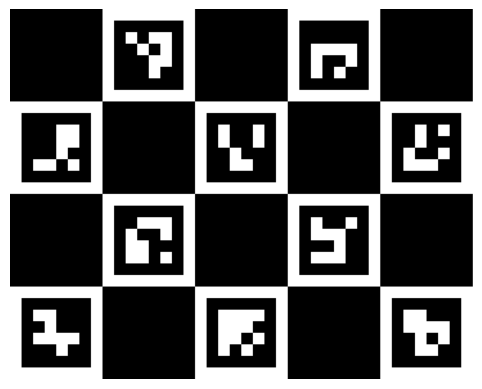

In [7]:
# 1. パラメータ設定（単位：メートル）
real_square_size_mm = 40.0
real_square_size_m = real_square_size_mm / 1000.0
real_marker_size_m = real_square_size_m * 0.75
square_num_x = 5
square_num_y = 4

file_name_pdf = create_file_name(square_num_x, square_num_y, real_square_size_m)
file_path_pdf = f'{folder_path_output}/{file_name_pdf}.pdf'

# 2. Charucoボード定義（OpenCV）
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)
board = cv2.aruco.CharucoBoard((square_num_x, square_num_y), real_square_size_m, real_marker_size_m, aruco_dict)

# 3. 画像サイズ（物理サイズから計算）→ DPI = 300
dpi = 300
mm_per_inch = 25.4

# 印刷領域のサイズ（単位：mm）
charuco_width_mm = square_num_x * real_square_size_mm  # 例：5×40mm = 200mm
charuco_height_mm = square_num_y * real_square_size_mm # 例：4×40mm = 160mm

# ピクセルサイズ（OpenCVでの画像生成）
charuco_width_px = int(charuco_width_mm / mm_per_inch * dpi)
charuco_height_px = int(charuco_height_mm / mm_per_inch * dpi)

# OpenCVで画像生成（NumPy → PILに変換）
img = board.generateImage((charuco_width_px, charuco_height_px), marginSize=0, borderBits=1)
img_pil = Image.fromarray(img)
img_path = file_path_pdf.replace(".pdf", ".png")
img_pil.save(img_path, dpi=(dpi, dpi))

# A4用紙上に画像を mm 単位で正確に配置（中央）

c = canvas.Canvas(file_path_pdf, pagesize=landscape(A4))

# A4サイズ（ポイント：1pt = 1/72 inch）
page_width_pt, page_height_pt = landscape(A4) # A4
charuco_width_pt = charuco_width_mm * 72 / mm_per_inch
charuco_height_pt = charuco_height_mm * 72 / mm_per_inch
x_offset = (page_width_pt - charuco_width_pt) / 2
y_offset = (page_height_pt - charuco_height_pt) / 2

# PDFに画像貼り付け
c.drawImage(img_path, x_offset, y_offset, width=charuco_width_pt, height=charuco_height_pt)
c.showPage()
c.save()

print(f"Finish : {file_path_pdf}")

plt.imshow(img, cmap='gray')
plt.axis('off')


## 3.2. Charuco: 5x4, square=40.0 mm

Finish : ./board/charuco_A4_11x6_20.00_mm.pdf


(-0.5, 2597.5, 1416.5, -0.5)

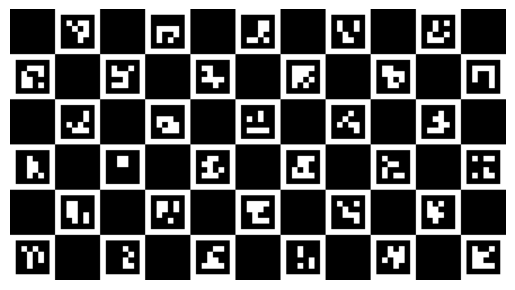

In [8]:
# 1. パラメータ設定（単位：メートル）
real_square_size_mm = 20.0
real_square_size_m = real_square_size_mm / 1000.0
real_marker_size_m = real_square_size_m * 0.75
square_num_x = 11
square_num_y = 6

file_name_pdf = create_file_name(square_num_x, square_num_y, real_square_size_m)
file_path_pdf = f'{folder_path_output}/{file_name_pdf}.pdf'

# 2. Charucoボード定義（OpenCV）
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)
board = cv2.aruco.CharucoBoard((square_num_x, square_num_y), real_square_size_m, real_marker_size_m, aruco_dict)

# 3. 画像サイズ（物理サイズから計算）→ DPI = 300
dpi = 300
mm_per_inch = 25.4

# 印刷領域のサイズ（単位：mm）
charuco_width_mm = square_num_x * real_square_size_mm  # 例：5×40mm = 200mm
charuco_height_mm = square_num_y * real_square_size_mm # 例：4×40mm = 160mm

# ピクセルサイズ（OpenCVでの画像生成）
charuco_width_px = int(charuco_width_mm / mm_per_inch * dpi)
charuco_height_px = int(charuco_height_mm / mm_per_inch * dpi)

# OpenCVで画像生成（NumPy → PILに変換）
img = board.generateImage((charuco_width_px, charuco_height_px), marginSize=0, borderBits=1)
img_pil = Image.fromarray(img)
img_path = file_path_pdf.replace(".pdf", ".png")
img_pil.save(img_path, dpi=(dpi, dpi))

# A4用紙上に画像を mm 単位で正確に配置（中央）
c = canvas.Canvas(file_path_pdf, pagesize=landscape(A4))

# A4サイズ（ポイント：1pt = 1/72 inch）
page_width_pt, page_height_pt = landscape(A4) # A4
charuco_width_pt = charuco_width_mm * 72 / mm_per_inch
charuco_height_pt = charuco_height_mm * 72 / mm_per_inch
x_offset = (page_width_pt - charuco_width_pt) / 2
y_offset = (page_height_pt - charuco_height_pt) / 2

# PDFに画像貼り付け
c.drawImage(img_path, x_offset, y_offset, width=charuco_width_pt, height=charuco_height_pt)
c.showPage()
c.save()

print(f"Finish : {file_path_pdf}")

plt.imshow(img, cmap='gray')
plt.axis('off')
